In [11]:
import warnings
warnings.filterwarnings(action="ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
train_df = pd.read_parquet("data/train.parquet")
train_df.head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
0,TRAIN_000000,CN,EKP8,Bulk,30.736578,2020-10-15 4:03,Z517571,30.0,28,73100,...,3.77,15.9,2.730798,12,42.01,43.16,40.96,1407.668330,0.001660,3.048333
1,TRAIN_000001,CN,EUC8,Container,63.220425,2019-09-17 2:55,U467618,30.0,15,37900,...,-6.72,24.5,4.289058,10,67.53,64.55,59.34,2089.046774,0.001614,17.138611
2,TRAIN_000002,CN,NGG6,Container,90.427421,2019-02-23 6:43,V378315,50.0,7,115000,...,0.00,9.4,0.000000,14,65.30,66.39,56.94,603.193047,0.001743,98.827500
3,TRAIN_000003,JP,TMR7,Cargo,0.000000,2020-09-18 22:06,B726632,10.0,33,1490,...,-7.31,22.1,4.693735,7,43.02,43.15,41.11,1169.853455,0.000069,0.000000
4,TRAIN_000004,RU,NNC2,Container,8.813725,2022-08-13 12:57,D215135,30.0,10,27600,...,2.31,22.8,2.345875,14,90.45,93.65,88.11,1107.944894,0.000197,96.030556


In [6]:
test_df = pd.read_parquet("data/test.parquet")
test_df.head()

,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE
0,TEST_000000,JP,HYG5,Tanker,9.508139,2022-08-27 8:29,R721438,20.0,9,5510,...,0.18,0.63,26.8,0.850060,17,97.88,96.49,89.55,766.977634,0.000256
1,TEST_000001,SG,GIW5,Container,24.186684,2022-03-27 20:57,G185231,40.0,14,109000,...,-0.81,-0.77,27.5,1.213528,4,98.14,104.64,100.60,1655.006791,0.002615
2,TEST_000002,TW,EKP8,Cargo,0.000000,2023-01-18 2:06,P862781,20.0,14,13700,...,-6.25,-12.57,16.1,6.557436,10,83.70,84.98,79.48,682.595117,0.000427
3,TEST_000003,JP,HYG5,Bulk,0.000000,2016-08-02 0:59,B415437,10.0,18,2840,...,NaN,NaN,NaN,NaN,9,38.85,41.80,39.51,629.378100,0.000256
4,TEST_000004,SG,GIW5,Container,19.834186,2023-01-24 0:27,J412562,30.0,23,30700,...,1.58,-4.47,23.8,3.180123,8,83.88,86.13,80.13,563.101921,0.002615


In [26]:
print(train_df.iloc[3])

SAMPLE_ID                 TRAIN_000003
ARI_CO                              JP
ARI_PO                            TMR7
SHIP_TYPE_CATEGORY               Cargo
DIST                               0.0
ATA                   2020-09-18 22:06
ID                             B726632
BREADTH                           10.0
BUILT                               33
DEADWEIGHT                        1490
DEPTH                             10.0
DRAUGHT                            0.0
GT                                 700
LENGTH                            70.0
SHIPMANAGER                     MWFU27
FLAG                             Nauru
U_WIND                            4.34
V_WIND                           -7.31
AIR_TEMPERATURE                   22.1
BN                            4.693735
ATA_LT                               7
DUBAI                            43.02
BRENT                            43.15
WTI                              41.11
BDI_ADJ                    1169.853455
PORT_SIZE                

In [ ]:
train_df["date"] = train_df["ATA_LT"].apply(lambda x: date.isoweekday(date(*x.split("-"))))

In [12]:
train_df.columns

Index(['SAMPLE_ID', 'ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'DIST', 'ATA',
       'ID', 'BREADTH', 'BUILT', 'DEADWEIGHT', 'DEPTH', 'DRAUGHT', 'GT',
       'LENGTH', 'SHIPMANAGER', 'FLAG', 'U_WIND', 'V_WIND', 'AIR_TEMPERATURE',
       'BN', 'ATA_LT', 'DUBAI', 'BRENT', 'WTI', 'BDI_ADJ', 'PORT_SIZE',
       'CI_HOUR'],
      dtype='object')

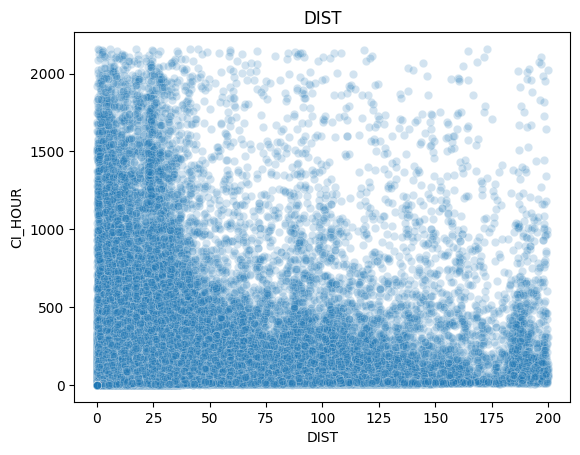

In [7]:
ax = sns.scatterplot(x=train_df["DIST"], y=train_df["CI_HOUR"], alpha=0.2)
ax.set_title("DIST")
plt.show()

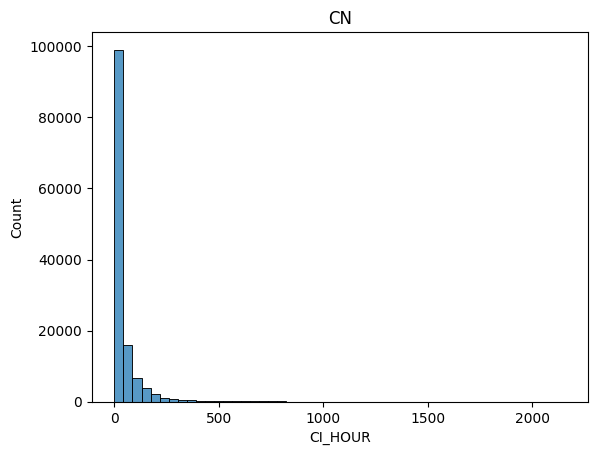

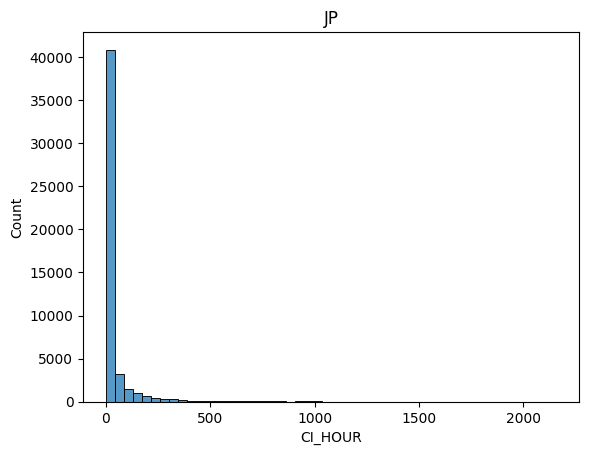

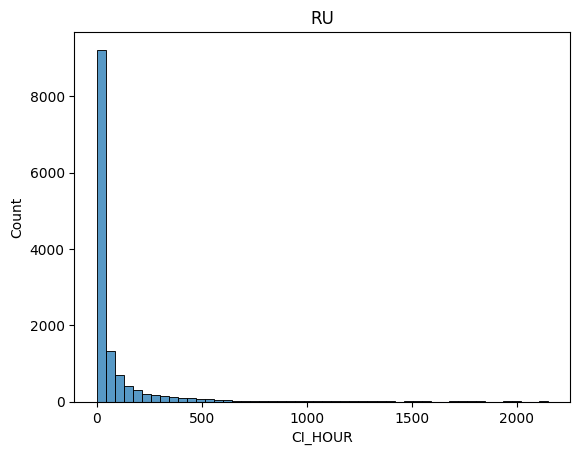

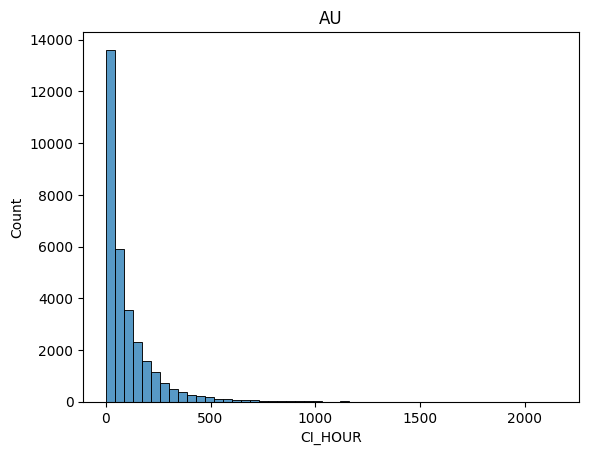

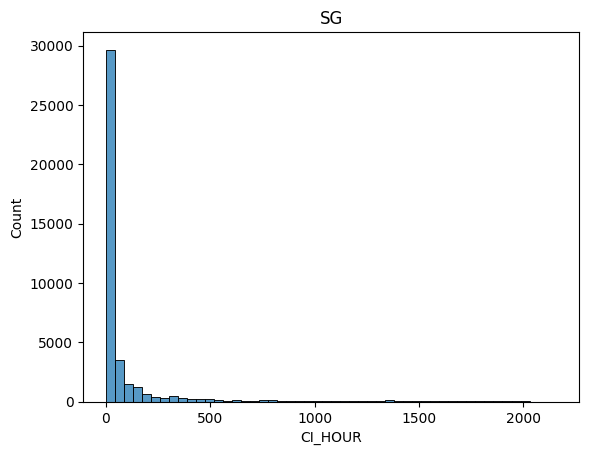

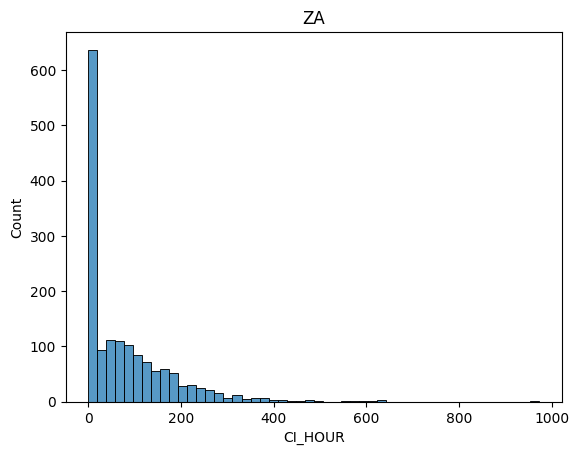

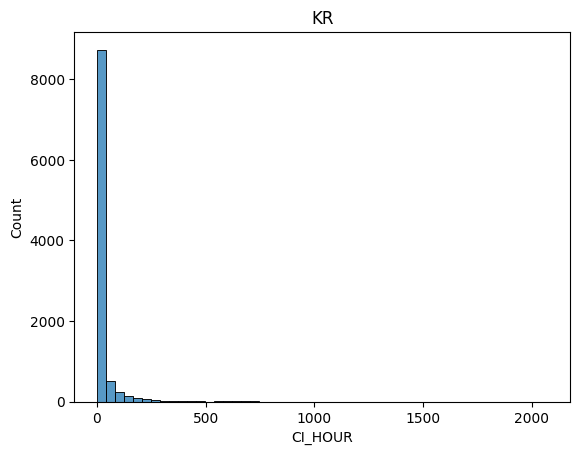

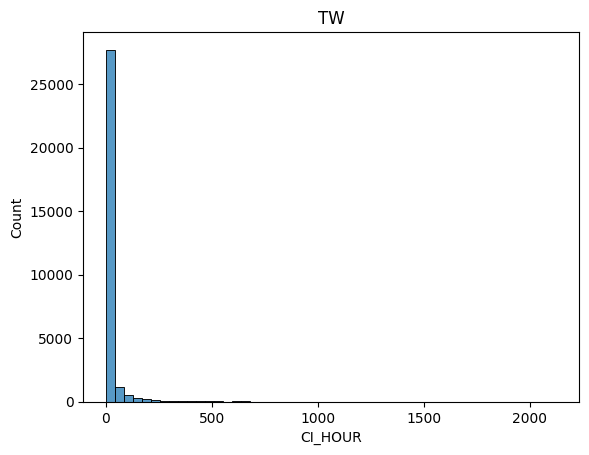

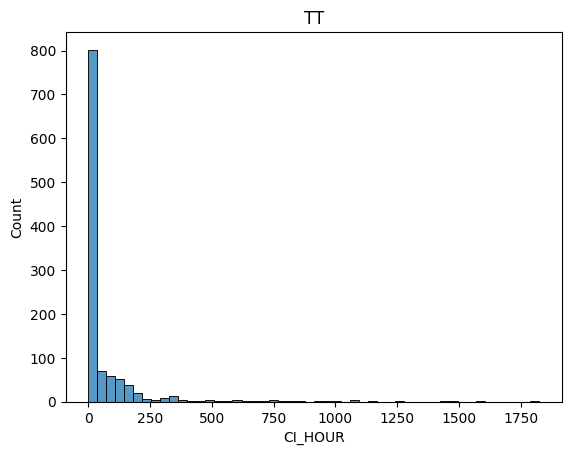

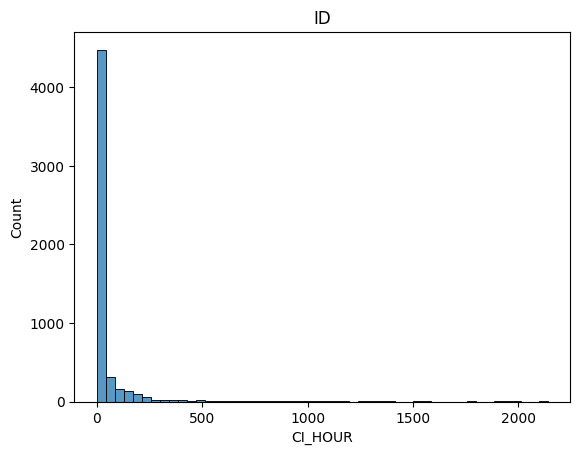

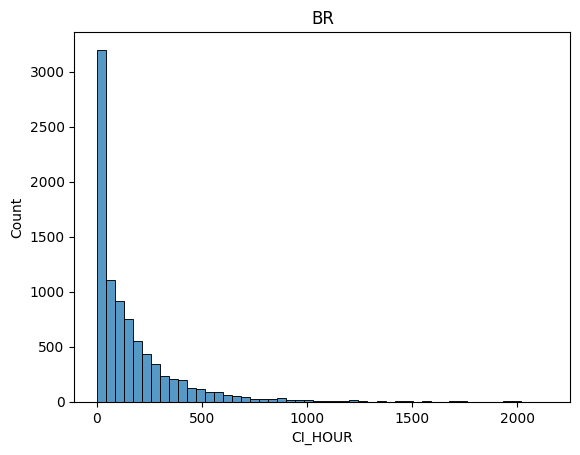

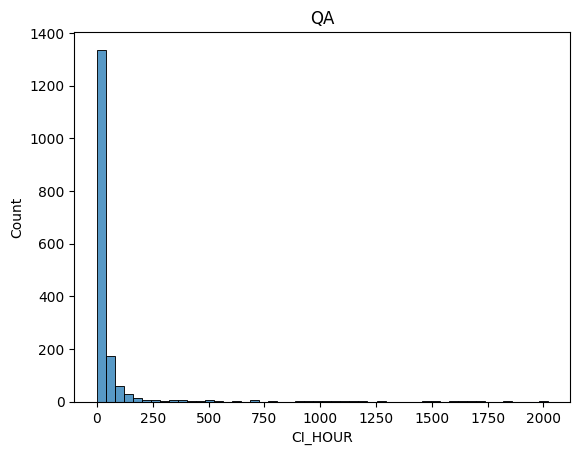

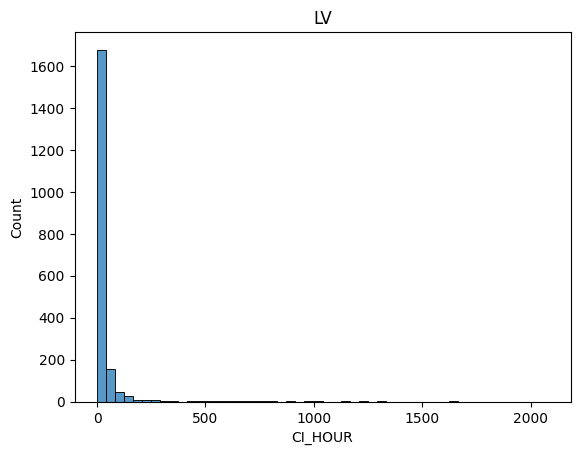

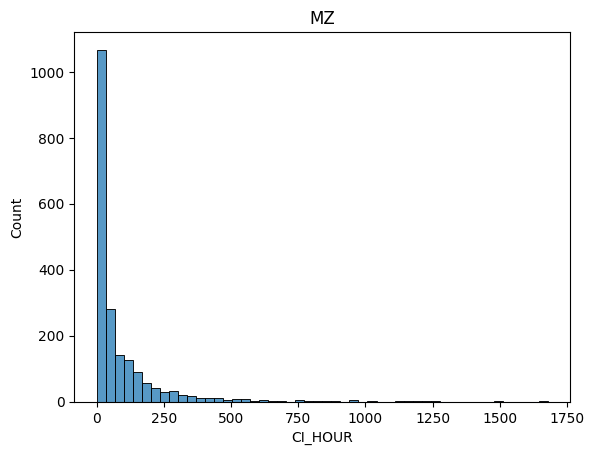

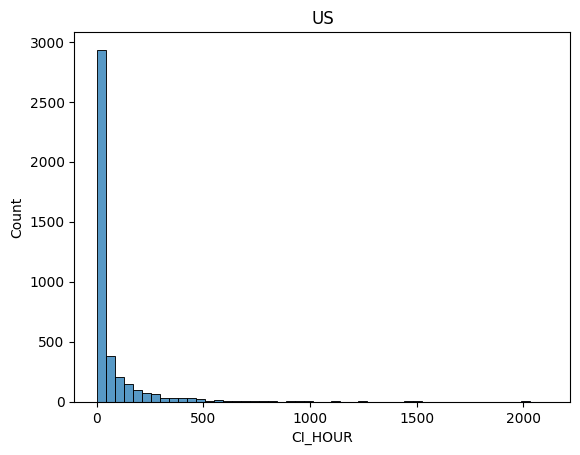

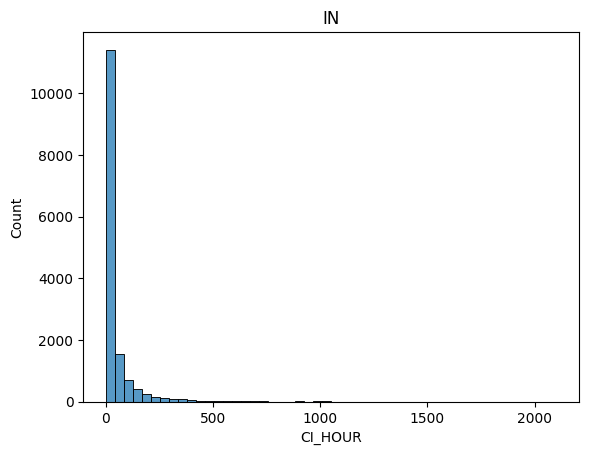

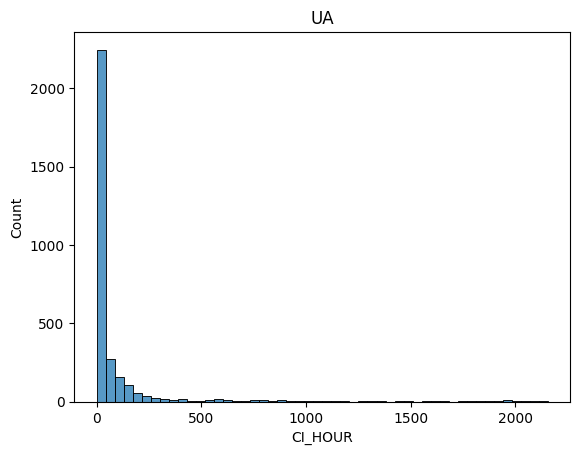

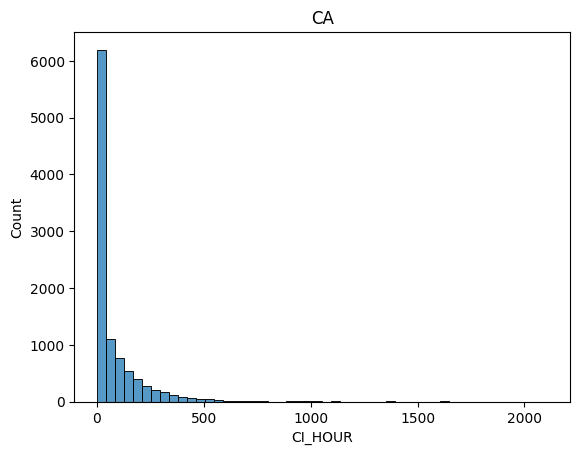

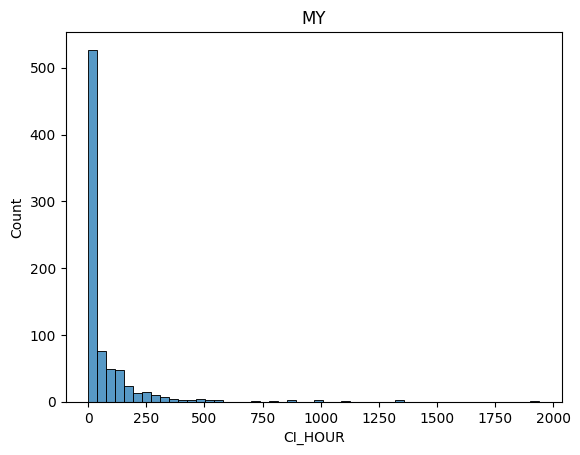

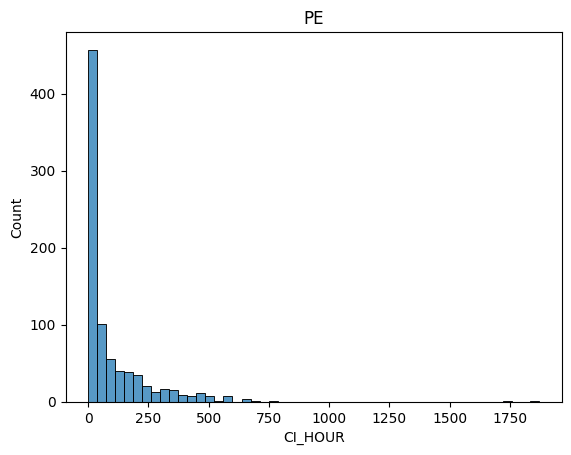

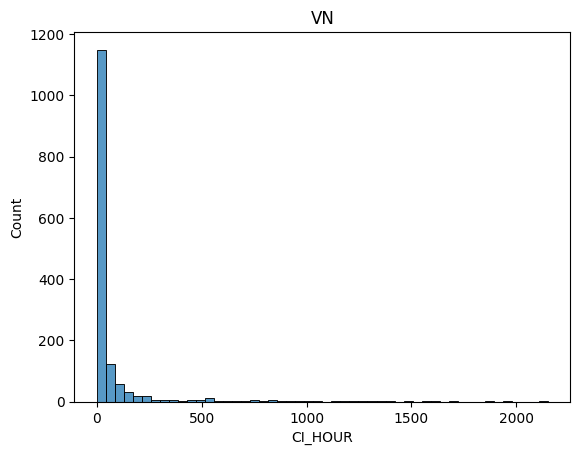

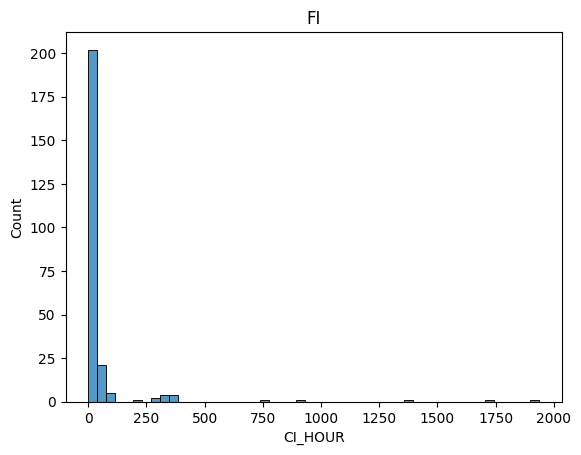

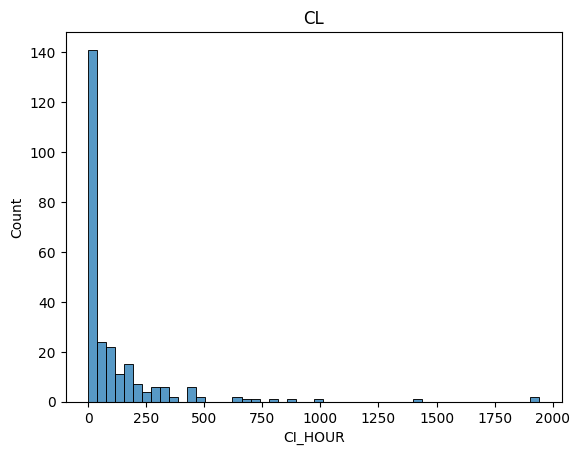

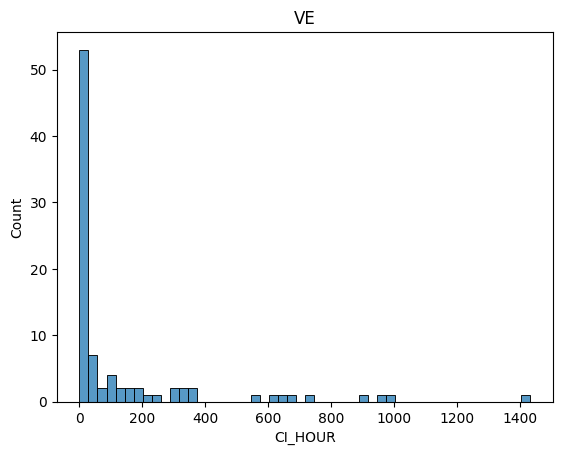

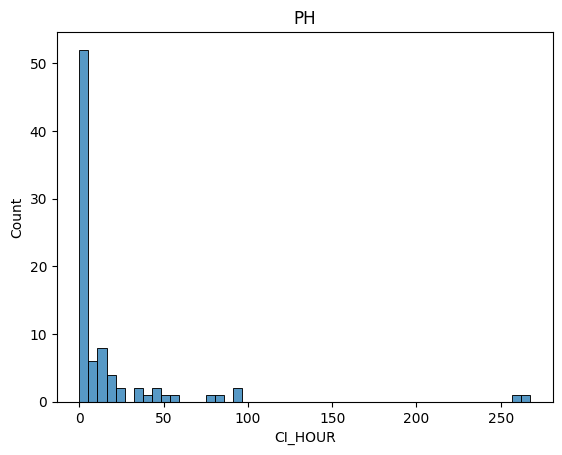

In [16]:
for name in train_df["ARI_CO"].unique():
    df = train_df[train_df["ARI_CO"] == name]
    ax = sns.histplot(df["CI_HOUR"], bins=50)
    ax.set_title(name)
    plt.show()